In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('../assests/scaled_voice_data.csv')
x = df.drop('gender', axis=1)
y = df['gender']
le = LabelEncoder()
Y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, Y_encoded, test_size = 0.2, random_state = 100)

In [6]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495,male
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773,male
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240,female
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419,female
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663,female


### Decision Tree with gini criterion


In [3]:
depth = [4,8,10,15,20]
for i in depth:
    DT = DecisionTreeClassifier(criterion = "gini", max_depth = i)
    DT.fit(X_train, y_train)
    y_pred =DT.predict(X_test)
    
    # Model Performance
    print("Accuracy with tree depth {} is:".format(i), accuracy_score(y_test, y_pred))
    print("Precision with tree depth {} is:".format(i), precision_score(y_test, y_pred))
    print("Recall with tree depth {} is:".format(i), recall_score(y_test, y_pred))
    print("F1 Score with tree depth {} is:".format(i), f1_score(y_test, y_pred))
    print("\n")

Accuracy with tree depth 4 is: 0.9747634069400631
Precision with tree depth 4 is: 0.9750778816199377
Recall with tree depth 4 is: 0.9750778816199377
F1 Score with tree depth 4 is: 0.9750778816199377


Accuracy with tree depth 8 is: 0.9763406940063092
Precision with tree depth 8 is: 0.9693251533742331
Recall with tree depth 8 is: 0.9844236760124611
F1 Score with tree depth 8 is: 0.9768160741885625


Accuracy with tree depth 10 is: 0.9779179810725552
Precision with tree depth 10 is: 0.9694189602446484
Recall with tree depth 10 is: 0.9875389408099688
F1 Score with tree depth 10 is: 0.9783950617283951


Accuracy with tree depth 15 is: 0.9716088328075709
Precision with tree depth 15 is: 0.9690402476780186
Recall with tree depth 15 is: 0.9750778816199377
F1 Score with tree depth 15 is: 0.9720496894409938


Accuracy with tree depth 20 is: 0.9700315457413249
Precision with tree depth 20 is: 0.9660493827160493
Recall with tree depth 20 is: 0.9750778816199377
F1 Score with tree depth 20 is: 0.97

### Decision Tree with Entropy


In [4]:
from sklearn import tree
import matplotlib.pyplot as plt
depth = [4,8,10,15,20]
for i in depth:
    DT = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
    DT.fit(X_train, y_train)
    y_pred =DT.predict(X_test)
    # Model Accuracy
    print("Accuracy with tree depth {} is:".format(i), accuracy_score(y_test, y_pred))
    print("Precision with tree depth {} is:".format(i), precision_score(y_test, y_pred))
    print("Recall with tree depth {} is:".format(i), recall_score(y_test, y_pred))
    print("F1 Score with tree depth {} is:".format(i), f1_score(y_test, y_pred))
    print("\n")

Accuracy with tree depth 4 is: 0.9716088328075709
Precision with tree depth 4 is: 0.963302752293578
Recall with tree depth 4 is: 0.9813084112149533
F1 Score with tree depth 4 is: 0.9722222222222222


Accuracy with tree depth 8 is: 0.9684542586750788
Precision with tree depth 8 is: 0.963076923076923
Recall with tree depth 8 is: 0.9750778816199377
F1 Score with tree depth 8 is: 0.9690402476780186


Accuracy with tree depth 10 is: 0.9668769716088328
Precision with tree depth 10 is: 0.9518072289156626
Recall with tree depth 10 is: 0.9844236760124611
F1 Score with tree depth 10 is: 0.9678407350689127


Accuracy with tree depth 15 is: 0.9637223974763407
Precision with tree depth 15 is: 0.9515151515151515
Recall with tree depth 15 is: 0.9781931464174455
F1 Score with tree depth 15 is: 0.9646697388632873


Accuracy with tree depth 20 is: 0.9621451104100947
Precision with tree depth 20 is: 0.9486404833836858
Recall with tree depth 20 is: 0.9781931464174455
F1 Score with tree depth 20 is: 0.9631

### Tree

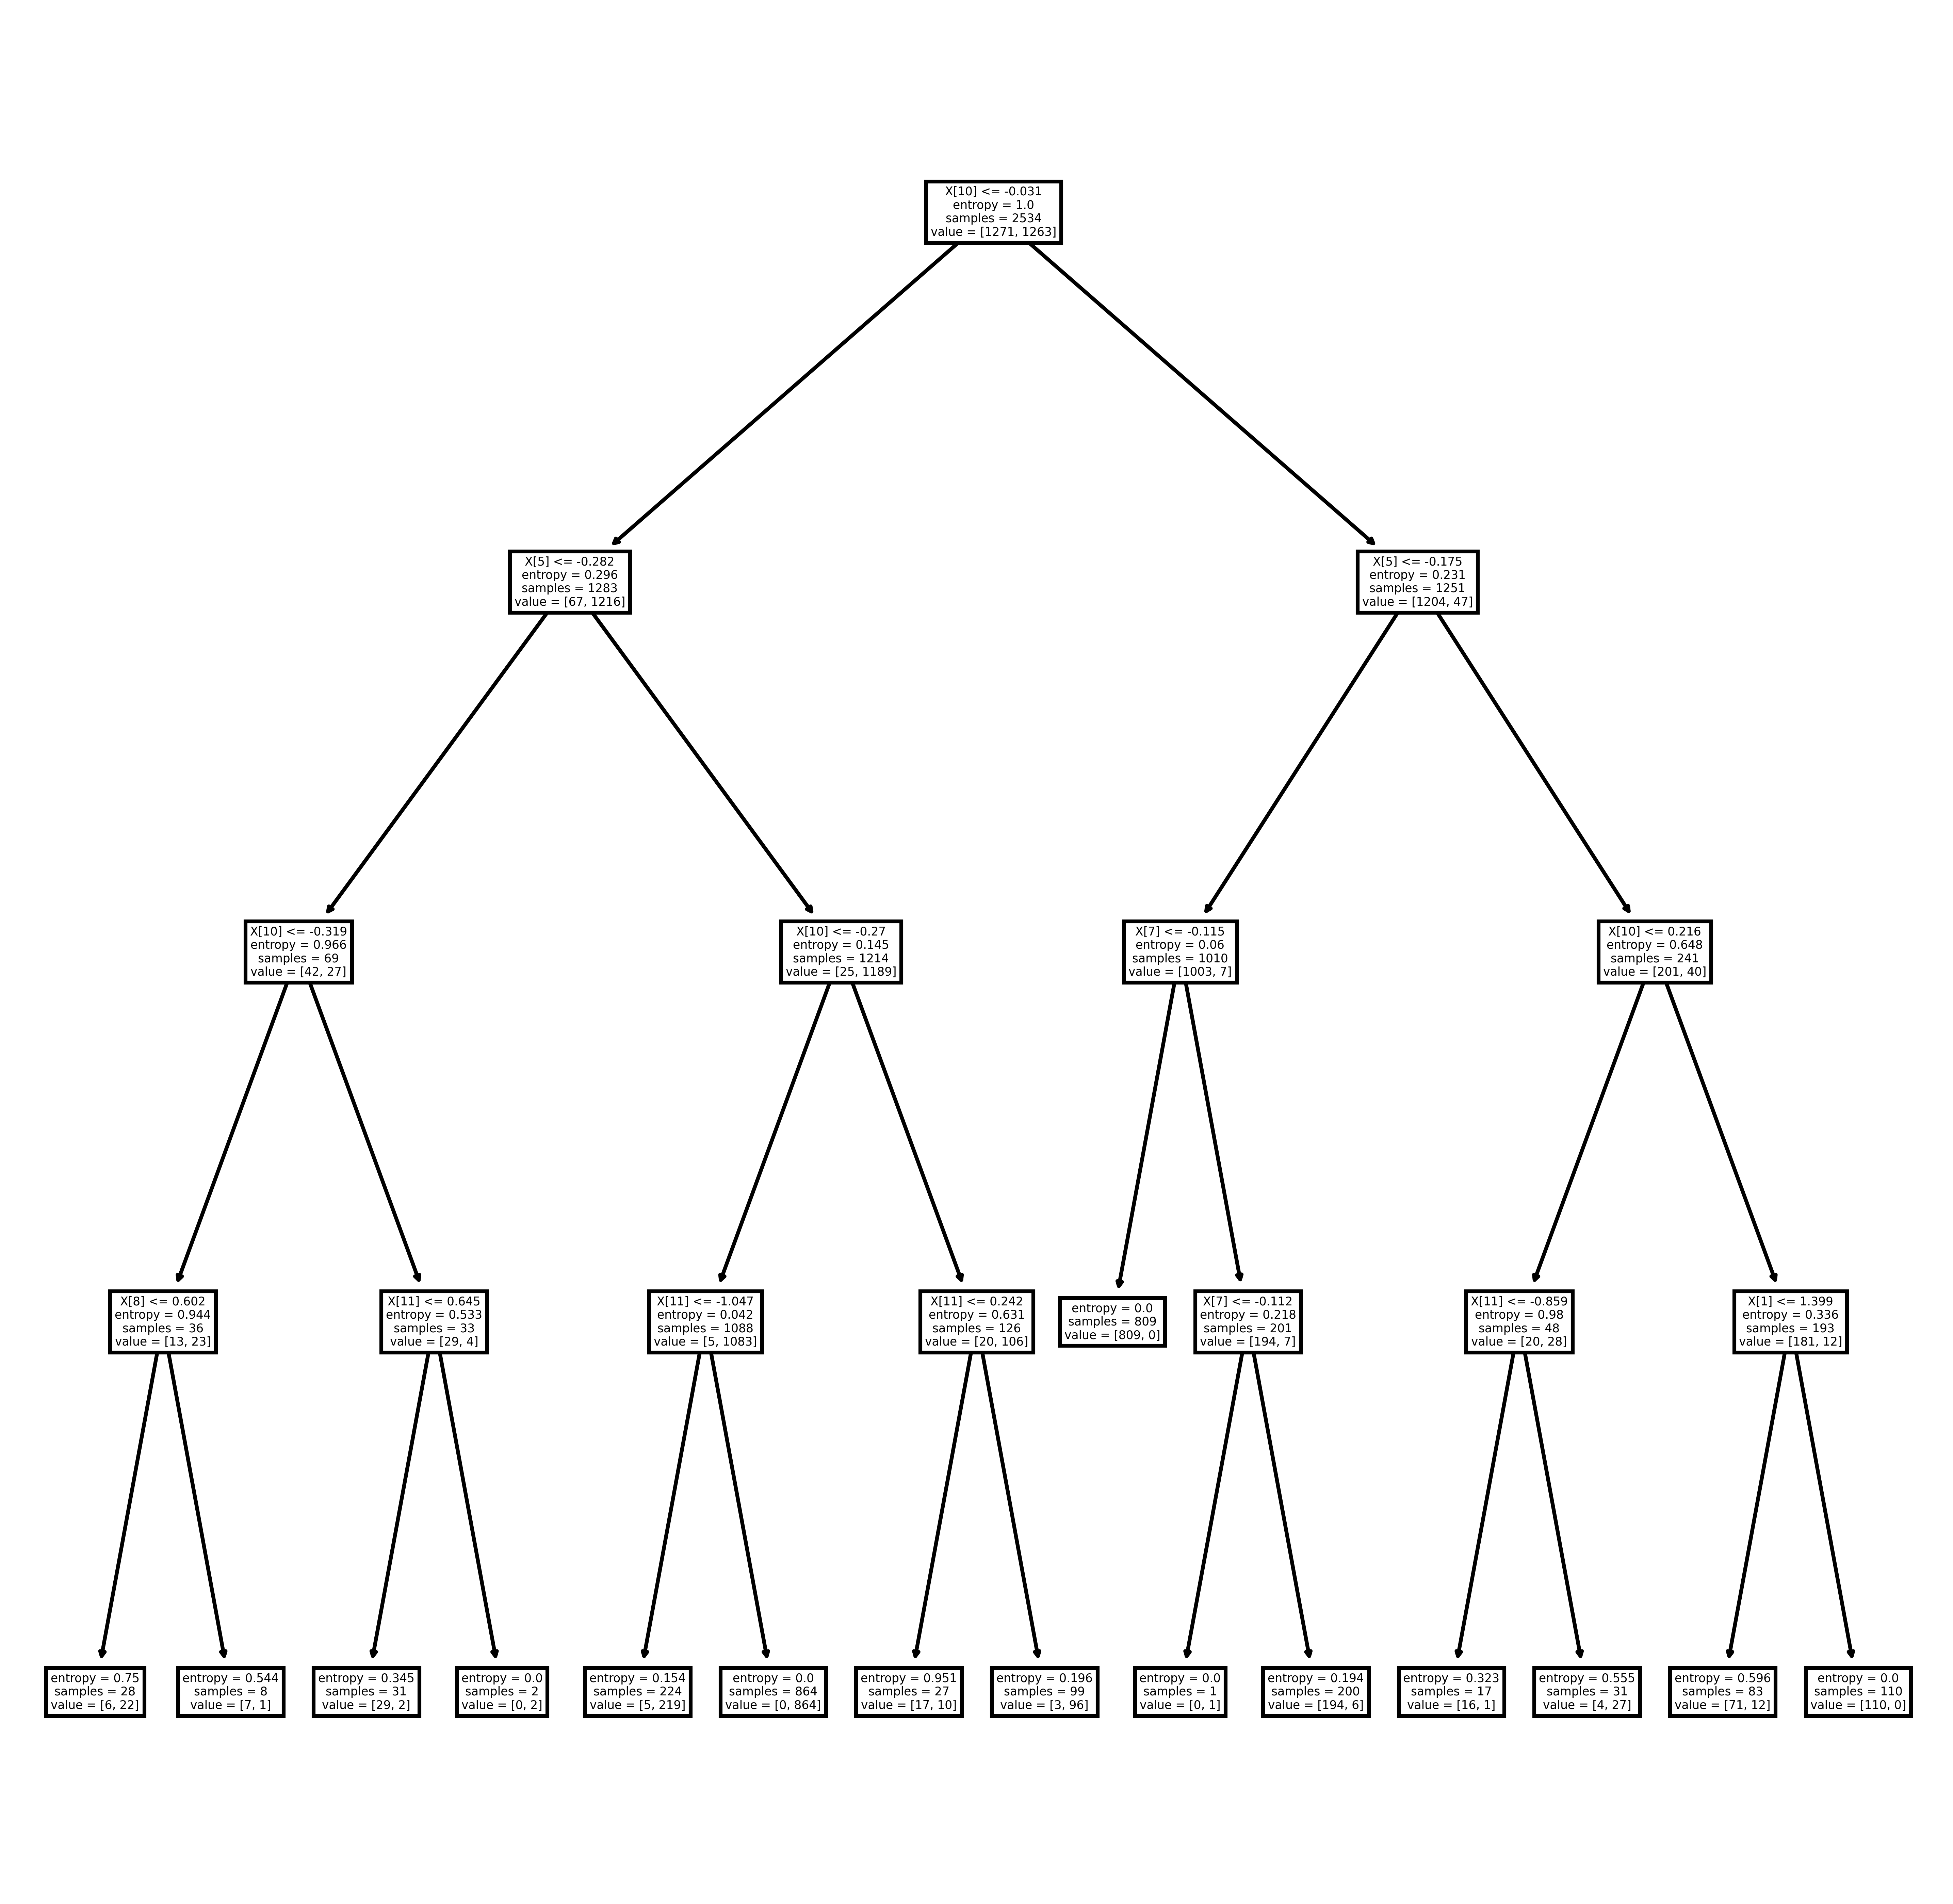

In [5]:
fig, axes = plt.subplots(nrows=1,ncols = 1,figsize = (9,9), dpi=800)
newDT = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
newDT.fit(X_train, y_train)
tree.plot_tree(newDT)
fig.savefig('images/Decision_Tree.png', dpi=250)